In [3]:
# import the required modules
import requests
import time
import pandas as pd
import datetime
import pprint
from datetime import date 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# external python files
import plot_functions as pf
import text_functions as tf
# from collections import Counter
# from string import punctuation

In [4]:
# 1.1 Class Declaration ------------------------------------------------------#
class sneaker_site:
    '''
    DESCRIPTION: Purpose of this class is to store website data located from various
        sneaker websites and retrieve pertinent key words from each object's scrape.
        The data scraped is then transformed into a tibble, which is then exported as 
        it's on individual CSV, later utilized for follow-on analytics
    '''
    
    # initialize the class
    def __init__ (self, name, url): # provide the name of the website and the url
        '''
        DESCRIPTION: initialize class with default class arguments
        '''
        self.website_name = name # set the name
        self.url = url # save the url
        self.site_text = '' # value to save the site text for each object
        self.converted_site_text = '' # converting the extracted value to lower case, via the 'text_functions' file
        self.lines = ''
        
        # create a dataframe to store extracted values for each object
        self.site_df = pd.DataFrame(columns = ['website','dtg', 'date','year', 'month', 'day', 'category_name', 'item', 'count'])
        self.site_df['website'] = self.website_name # assign the website name to the entire class dataframe
        
        # creating Beautiful Soup variables to store individual values
        self.soup = '' # variable to store the complete values 
        self.hyperlink_list = '' # variable to store the hyperlinks tags
        self.paragraph_list = '' # variable to store paragraph value tags
        self.bold_list = '' # variable to store bold value tags
        
        # create the site variables to aggregate total counts for each object
        self.nike_site_count = 0
        self.adidas_site_count = 0
        self.reebok_site_count = 0
        self.new_balance_site_count = 0
        self.puma_site_count = 0
        self.vans_site_count = 0

        # default Nike list with different Nike shoe companies
        self.nike_master = ['nike', 'jordan', 'converse'] 
        # ['Nike', 'Air', 'Max', 'Jordan', 'Zoom', 'React', 'Shox', 'ACG', 'Max Plus', 'Joyride', 'Tinker', 'Force', 'Westbrook', 'Kyrie','Lebron', 'Durant', 'SB', 'Air Max 90', 'Air Max 97', 'Air Max 1', 'Kyrie', 'Air Max 270', 'Travis Scott' ]

        # default Adidas list with different Adidas shoe companies
        self.adidas_master = ['adidas', 'reebok', 'adidas', 'kanye', 'yeezy']
        # ['Adidas', 'ADIDAS', 'adidas', 'Yeezy', 'Kanye', 'Ultraboost', 'EQT', 'NMD', 'Ultra Boost', 'FYW', 'Harden']
        
        # default New Balance list 
        self.new_balance_master = ['NB', 'new balance']
        # ['New Balance', 'NB', 'Balance', '997', '801']
        
        # default Puma LIst
        self.puma_master = ['Puma', 'puma']
        #['Puma', 'Cell Venom', 'Thunder Spectre', 'Clyde Court']

        # default Vans list
        self.vans_master = ['Vans','vans']
        
        # concatenante the individual sneaker lists into one master list
        self.sneaker_list = self.nike_master + self.adidas_master + self.new_balance_master + self.puma_master + self.vans_master
        self.length = len(self.sneaker_list)         
        print("{} website object created".format(self.website_name))
    
    # class function to calculate the counts of each sneaker value in the master 'sneaker_list' data structure
    def site_calculate(self):
        '''
        DESCRIPTION: extract each website's raw data and append in the object's dataframe
        '''
        
        # to calculate the time needed to process the function from start to finish
        start_time = time.time() 
        print("\nRetrieving {} text and data ...".format(self.website_name))
        
        # establish connection to the website
        r = requests.get(self.url)
        self.soup = BeautifulSoup(r.content, "html.parser")
        
        # find and categorize all hyperlink (a), paragraph (p), and bold (b) html tags
        print("\nConsolidating all hyperlinks and paragraphs for", self.website_name)        
        self.hyperlink_list = self.soup.findAll('a')
        self.paragraph_list = self.soup.findAll('p')
        self.bold_list = self.soup.findAll('b')
        
        # convert individual Soup categories to text
        self.site_text = self.soup.get_text()
        self.converted_site_text = tf.normalize_string(self.site_text)
        print("\nConverting ", self.website_name, " to text file ... ")
        
        self.lines = [self.site_text.lower() for line in self.site_text]
        print("\nCalculating individual counts: " )
        
        index_num = 0

        # utilize the for loop to iterate over each object and count the .... 
        # ... amount of times a value is depicted in each extraction
        for item in self.sneaker_list:
            
            # allocate object variables as values for the class dataframe
            website = self.website_name
            name = item + ': '
            count = self.converted_site_text.count(item) # count text items
            today = date.today()
            dtg = datetime.datetime.now()
            year = dtg.year
            month = dtg.month
            day_num = dtg.day

            category = ''
            
            # if count > 0 , aggregate the count based on shoe company name
            if count > 0:
                if item in self.nike_master:
                    self.nike_site_count += count
                    category = 'Nike'
                elif item in self.adidas_master:
                    self.adidas_site_count += count
                    category = 'Adidas'
                elif item in self.new_balance_master:
                    self.new_balance_site_count += count
                    category = 'New Balance'
                elif item in self.puma_master:
                    self.puma_site_count += count
                    category = 'Puma'
                elif item in self.vans_master:
                    self.vans_site_count += count
                    category = 'Vans'
                else: 
                    0
            else: 
                if item in self.nike_master:
                    category = 'Nike'
                elif item in self.adidas_master:
                    category = 'Adidas'
                elif item in self.new_balance_master:
                    category = 'New Balance'
                elif item in self.puma_master:
                    category = 'Puma'
                elif item in self.vans_master:
                    category = 'Vans'
                else: 
                    0      
                    
            # append each new row to the class dataframe
            self.site_df.loc[index_num] = [website, dtg, today, year, month, day_num, category, item, count]        
            print(name, count)
            index_num += 1
        
        elapsed_time = time.time() - start_time 
        print("\n{} data ingest completed, total elapsed time: {} seconds\n".format(self.website_name, round(elapsed_time,2)))
        
    def display_info(self):
        '''
        DESCRIPTION: display object information
        '''
        print("\nCalculating total counts by shoe company...")
        print("Total Nike mentions: ", self.nike_site_count)
        print("Total Adidas mentions: ", self.adidas_site_count)
        print("Total New Balance mentions: ", self.new_balance_site_count)
        print("Total Puma mentions: ", self.puma_site_count)      
        print("Total Vans mentions: ", self.vans_site_count)      
        # print(self.site_df)      
        
    def return_df(self):
        '''
        DESCRIPTION: return class dataframe 
        '''
        return self.site_df

    def display_soup(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.soup)
    
    def display_links(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.hyperlink_list)
    
    def display_paragraphs(self):
        '''
        DESCRIPTION: display paragraphs for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.paragraph_list)
        
    def display_bold(self):
        '''
        DESCRIPTION: display bold tags for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.bold_list)  

In [5]:
# 2.1: SNEAKERNEWS.com ingest and analysis -----------------------------------#
sneaker_news = sneaker_site('sneakernews.com', 'https://sneakernews.com/')
sneaker_news.site_calculate()
sneaker_news.display_info()

#sneaker_news.display_links()
#sneaker_news.display_paragraphs()
#sneaker_news.display_bold()
#sneaker_news.display_soup()


sneakernews.com website object created

Retrieving sneakernews.com text and data ...

Consolidating all hyperlinks and paragraphs for sneakernews.com

Converting  sneakernews.com  to text file ... 

Calculating individual counts: 
nike:  6
jordan:  25
converse:  2
adidas:  10
reebok:  3
adidas:  10
kanye:  0
yeezy:  8
NB:  0
new balance:  2
Puma:  0
puma:  2
Vans:  0
vans:  2

sneakernews.com data ingest completed, total elapsed time: 1.51 seconds


Calculating total counts by shoe company...
Total Nike mentions:  33
Total Adidas mentions:  31
Total New Balance mentions:  2
Total Puma mentions:  2
Total Vans mentions:  2


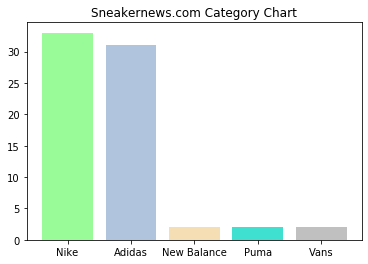

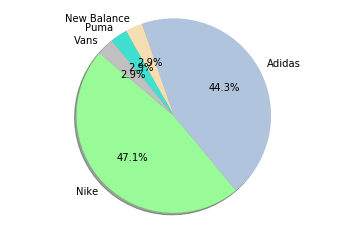

In [6]:
# retrieve master sneakernews.com dataframe
sneaker_news_df = sneaker_news.return_df()
sneaker_news_df.head(10)

# website plotting
pf.bar_chart(sneaker_news_df,'category_name', 'count', 'Sneakernews.com')
pf.pie_chart(sneaker_news_df,'category_name', 'count', 'Sneakernews.com')





In [7]:
# 2.2: SOLECOLLECTOR.com ingest and analysis ---------------------------------#
sole_collector = sneaker_site('Solecollector.com', 'https://solecollector.com/')
sole_collector.site_calculate()
sole_collector.display_info()

#sole_collector.display_links()
#sole_collector.display_paragraphs()
#sole_collector.display_bold()
#sole_collector.display_soup()

Solecollector.com website object created

Retrieving Solecollector.com text and data ...

Consolidating all hyperlinks and paragraphs for Solecollector.com

Converting  Solecollector.com  to text file ... 

Calculating individual counts: 
nike:  4
jordan:  5
converse:  0
adidas:  6
reebok:  1
adidas:  6
kanye:  0
yeezy:  4
NB:  0
new balance:  0
Puma:  0
puma:  1
Vans:  0
vans:  0

Solecollector.com data ingest completed, total elapsed time: 0.89 seconds


Calculating total counts by shoe company...
Total Nike mentions:  9
Total Adidas mentions:  17
Total New Balance mentions:  0
Total Puma mentions:  1
Total Vans mentions:  0


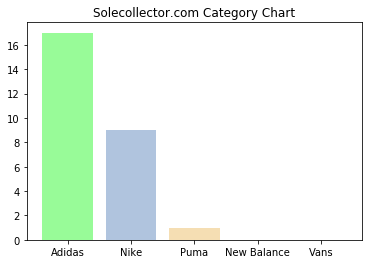

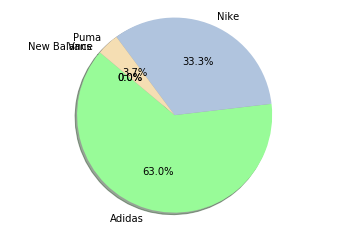

In [8]:
# retrieve master sneakernews.com dataframe
sole_collector_df = sole_collector.return_df()
sole_collector_df.head(10)

# website plotting
pf.bar_chart(sole_collector_df,'category_name', 'count', 'Solecollector.com')
pf.pie_chart(sole_collector_df,'category_name', 'count', 'Solecollector.com')


In [9]:
# 2.3: HYPEBEAST.com ingest and analysis -------------------------------------#
hypebeast = sneaker_site('hypebeast.com', 'https://hypebeast.com/')
hypebeast.site_calculate()
hypebeast.display_info()

#hypebeast.display_links()
#hypebeast.display_paragraphs()
#hypebeast.display_bold()
#hypebeast.display_soup()

hypebeast.com website object created

Retrieving hypebeast.com text and data ...

Consolidating all hyperlinks and paragraphs for hypebeast.com

Converting  hypebeast.com  to text file ... 

Calculating individual counts: 
nike:  5
jordan:  2
converse:  1
adidas:  4
reebok:  0
adidas:  4
kanye:  0
yeezy:  0
NB:  0
new balance:  0
Puma:  0
puma:  1
Vans:  0
vans:  0

hypebeast.com data ingest completed, total elapsed time: 1.32 seconds


Calculating total counts by shoe company...
Total Nike mentions:  8
Total Adidas mentions:  8
Total New Balance mentions:  0
Total Puma mentions:  1
Total Vans mentions:  0


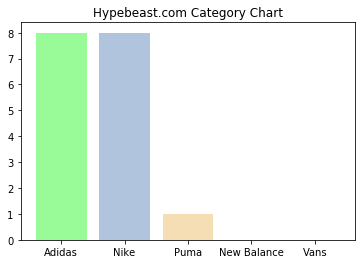

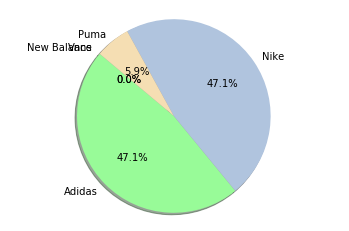


 End of Phase 2 ...



In [10]:
# retrieve master sneakernews.com dataframe
hypebeast_df = hypebeast.return_df()
hypebeast_df.head(10)

# website plotting
pf.bar_chart(hypebeast_df,'category_name', 'count', 'Hypebeast.com')
pf.pie_chart(hypebeast_df,'category_name', 'count', 'Hypebeast.com')

print("\n End of Phase 2 ...\n")



 Starting Phase 3 ...



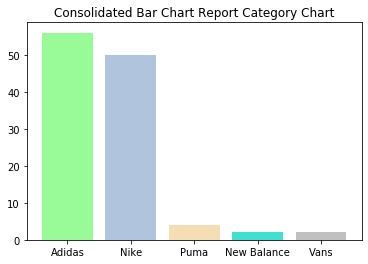

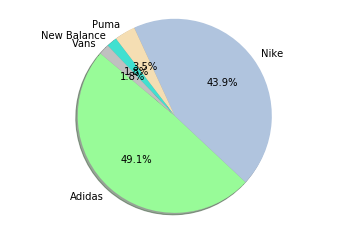

In [11]:
print("\n Starting Phase 3 ...\n")

# concat the three dataframes into a single, unified dataframe
frames = [sneaker_news_df, sole_collector_df, hypebeast_df]
day_master = pd.concat(frames)
day_master['short_date'] = day_master['dtg'].dt.date
day_master.head(10)

pf.bar_chart(day_master,'category_name', 'count', 'Consolidated Bar Chart Report')
pf.pie_chart(day_master,'category_name', 'count', 'Consolidated Pie Report')


In [12]:
path = '/Users/patrickbenitez/Desktop/GT/Codebook/Git/Py.sneakernews.webscrape/df_exports/'
# Converting date into DD-MM-YYYY format
temp_date = datetime.datetime.today()

file_date = temp_date.strftime('%Y-%m-%d')



In [13]:

# create the full file path
full_path = path + "v2_" +  file_date + ".csv"

# export the file to the /df_exports/ directory
day_master.to_csv(full_path)

print("\nFile successfully exported!")


File successfully exported!


In [14]:
# 4.1: Determine all version 1.0 files located in the 'df_exports' directory--#
import glob # to read in multiple csv files


print("\nRetrieving version 1.0 csv files ...")

csv_list = [] # store values in the list
for csv_file_v1 in glob.glob('df_exports/v1_*.csv'): # only retrieve "v1_" csv files
    csv_list.append(csv_file_v1)
    print (csv_file_v1)


Retrieving version 1.0 csv files ...
df_exports/v1_2019-11-18.csv
df_exports/v1_2019-11-24.csv
df_exports/v1_2019-11-30.csv
df_exports/v1_2019-11-25.csv
df_exports/v1_2019-11-19.csv
df_exports/v1_2019-11-27.csv
df_exports/v1_2019-11-26.csv
df_exports/v1_2019-11-22.csv
df_exports/v1_2019-11-23.csv
df_exports/v1_2019-11-21.csv
df_exports/v1_2019-11-20.csv
df_exports/v1_2019-12-02.csv
df_exports/v1_2019-12-03.csv
df_exports/v1_2019-12-01.csv
df_exports/v1_2019-12-14.csv
df_exports/v1_2019-12-10.csv
df_exports/v1_2019-12-11.csv
df_exports/v1_2019-12-05.csv
df_exports/v1_2019-12-07.csv
df_exports/v1_2019-12-06.csv
df_exports/v1_2019-12-12.csv
df_exports/v1_2019-12-20.csv
df_exports/v1_2019-12-08.csv
df_exports/v1_2019-12-09.csv
df_exports/v1_2019-12-19.csv
df_exports/v1_2019-11-17.csv
df_exports/v1_2019-11-16.csv
df_exports/v1_2019-11-28.csv
df_exports/v1_2019-11-29.csv


In [15]:
for csv_file_v2 in glob.glob('df_exports/v2_*.csv'): # only retrieve "v2_" csv files
    csv_list.append(csv_file_v2)
    print (csv_file_v2)

print("\nTotal amount of files: {}".format(len(csv_list)))

df_exports/v2_2020-01-23.csv
df_exports/v2_2019-12-28.csv
df_exports/v2_2020-01-09.csv
df_exports/v2_2020-01-21.csv
df_exports/v2_2020-03-18.csv
df_exports/v2_2020-01-20.csv
df_exports/v2_2020-01-08.csv
df_exports/v2_2019-12-29.csv
df_exports/v2_2020-01-24.csv
df_exports/v2_2020-01-18.csv
df_exports/v2_2020-03-09.csv
df_exports/v2_2020-03-20.csv
df_exports/v2_2020-01-25.csv
df_exports/v2_2020-01-27.csv
df_exports/v2_2020-01-26.csv
df_exports/v2_2020-02-17.csv
df_exports/v2_2020-02-29.csv
df_exports/v2_2020-02-15.csv
df_exports/v2_2020-02-14.csv
df_exports/v2_2020-02-18.csv
df_exports/v2_2020-02-27.csv
df_exports/v2_2020-02-21.csv
df_exports/v2_2019-12-22.csv
df_exports/v2_2020-01-03.csv
df_exports/v2_2020-01-17.csv
df_exports/v2_2020-03-06.csv
df_exports/v2_2020-03-12.csv
df_exports/v2_2020-03-13.csv
df_exports/v2_2020-03-07.csv
df_exports/v2_2020-01-02.csv
df_exports/v2_2019-12-23.csv
df_exports/v2_2019-12-21.csv
df_exports/v2_2020-01-28.csv
df_exports/v2_2020-01-14.csv
df_exports/v2_

In [16]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
master_df = pd.DataFrame(columns=['date', 'category_name', 'item', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'category_name', 'item', 'count']]
    master_df = pd.concat([master_df, sliced_df])
    
master_df['count'] = master_df['count'].astype(int)
master_df['date'] = master_df['date'].astype('datetime64[ns]')
master_df.dtypes
master_df.head(25)

date category_name         item  count
0  2019-11-18          Nike         Nike      9
1  2019-11-18          Nike       Jordan     20
2  2019-11-18          Nike     Converse      2
3  2019-11-18        Adidas       Adidas      0
4  2019-11-18        Adidas       Reebok      2
5  2019-11-18        Adidas       ADIDAS      0
6  2019-11-18        Adidas        Yeezy      8
7  2019-11-18        Adidas        Kanye      0
8  2019-11-18        Adidas       adidas     10
9  2019-11-18        Adidas        kanye      0
10 2019-11-18        Adidas        yeezy      0
11 2019-11-18   New Balance  New Balance      2
12 2019-11-18   New Balance           NB      0
13 2019-11-18   New Balance  new balance      0
14 2019-11-18          Puma         Puma      2
15 2019-11-18          Puma         puma      0
16 2019-11-18          Vans         Vans      2
17 2019-11-18          Vans         vans      0
18 2019-11-18          Nike         Nike      8
19 2019-11-18          Nike       Jordan      3
20 2019-11-18          Nike     Converse      0
21 2019-11-18        Adidas       Adidas      1
22 2019-11-18        Adidas       Reebok      3
23 2019-11-18        Adidas       ADIDAS      0
24 2019-11-18        Adidas        Yeezy      0

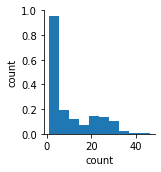

In [17]:
# group by sum the master_df dataframe for follow-on analysis
master_sum_df = master_df.groupby(['date','category_name', 'item']).sum().reset_index()
summarized_df = master_sum_df[master_sum_df['count'] != 0]
summarized_df.head(5)

sns.pairplot(summarized_df)

In [18]:
# 4.2.2: Unstack and pairplot the master dataframe for category_name df - #
category_df = master_df[['date','category_name','count']]
category_df = category_df.groupby(['date','category_name']).sum().reset_index()
category_df.head(20)

date category_name  count
0  2019-11-16        Adidas     26
1  2019-11-16   New Balance      3
2  2019-11-16          Nike     57
3  2019-11-16          Puma      4
4  2019-11-16          Vans      2
5  2019-11-17        Adidas     25
6  2019-11-17   New Balance      3
7  2019-11-17          Nike     52
8  2019-11-17          Puma      4
9  2019-11-17          Vans      4
10 2019-11-18        Adidas     31
11 2019-11-18   New Balance      3
12 2019-11-18          Nike     52
13 2019-11-18          Puma      4
14 2019-11-18          Vans      2
15 2019-11-19        Adidas     27
16 2019-11-19   New Balance      4
17 2019-11-19          Nike     53
18 2019-11-19          Puma      4
19 2019-11-19          Vans      3

In [19]:
unstack_category_df = category_df.pivot_table(index = ['date'], 
                                   columns = 'category_name',
                                   values = 'count',
                                   aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_category_df.tail(50)

date  Adidas  New Balance  Nike  Puma  Vans
37 2019-12-29      31            2    53     4     3
38 2019-12-30      34            2    60     4     2
39 2019-12-31      39            2    54     4     4
40 2020-01-01      38            2    52     4     5
41 2020-01-02      38            3    50     4     5
42 2020-01-03      60            2    55     4     2
43 2020-01-05      37            3    56     4     2
44 2020-01-07      57            3    56     4     2
45 2020-01-08      38            3    49     4     3
46 2020-01-09      46            2    52     4     2
47 2020-01-10      48            2    44     5     2
48 2020-01-11      45            3    44     4     2
49 2020-01-12      44            3    47     4     2
50 2020-01-13      35            2    55     4     3
51 2020-01-14      41            3    47     4     2
52 2020-01-15      38            4    51     4     2
53 2020-01-17      37            2    48     4     6
54 2020-01-18      39            2    46     4     6
55 2020-01-20      49            2    45     4     2
56 2020-01-21      46            2    58     4     2
57 2020-01-23      40            2    54     4     2
58 2020-01-24      43            4    47     4     3
59 2020-01-25      45            2    45     5     3
60 2020-01-26      48            3    43     4     2
61 2020-01-27      42            2    51     4     2
62 2020-01-28      39            4    49     4     2
63 2020-02-14      31            2    50     4     2
64 2020-02-15      37            2    47     4     2
65 2020-02-17      36            6    44     4     2
66 2020-02-18      40            3    43     4     2
67 2020-02-21      43            3    36     5     5
68 2020-02-27      34            6    51     4     2
69 2020-02-29      40            4    45     8     2
70 2020-03-01      40            3    47     9     2
71 2020-03-02      46            2    47     8     2
72 2020-03-03      36            3    56     4     2
73 2020-03-04      40            5    49     4     2
74 2020-03-05      29            4    51     4     2
75 2020-03-06      32            2    55     5     2
76 2020-03-07      36            6    47     4     2
77 2020-03-09      29            7    53     4     3
78 2020-03-10      30            4    57     4     2
79 2020-03-11      37            6    48     4     2
80 2020-03-12      33            5    51     4     2
81 2020-03-13      37            4    47     4     2
82 2020-03-14      39            2    52     4     2
83 2020-03-15      33            2    56     4     2
84 2020-03-16      33            2    54     4     2
85 2020-03-18      39            2    49     4     2
86 2020-03-20      56            2    50     4     2

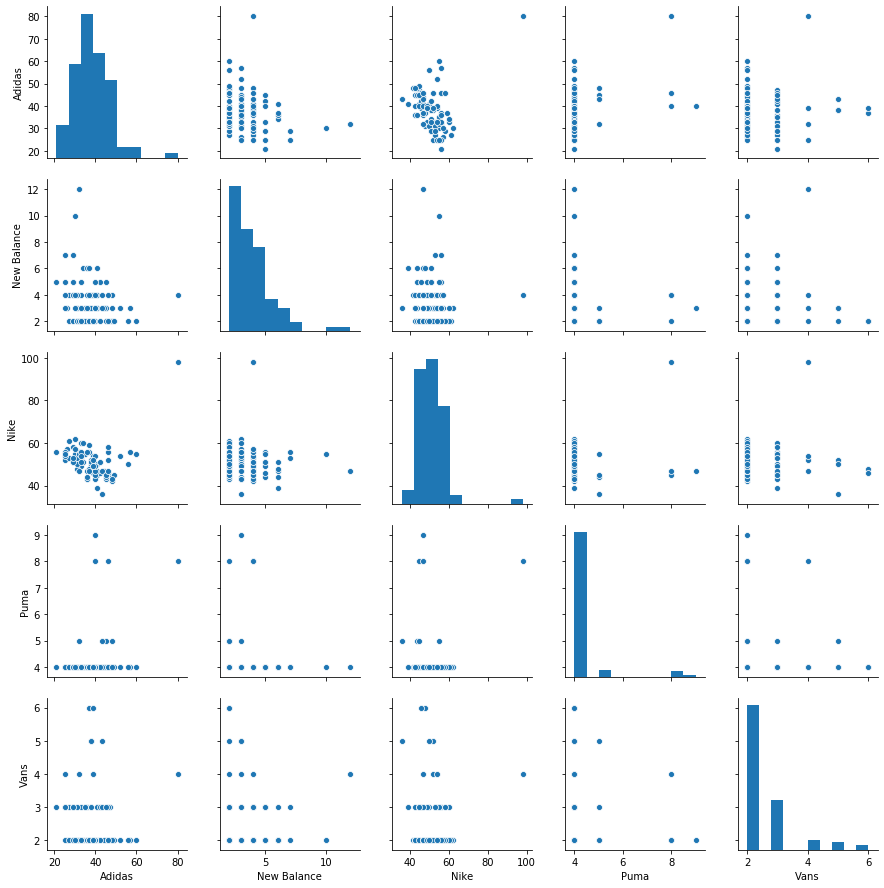

In [20]:

sns.pairplot(unstack_category_df) # pairplot the category dataframe


In [21]:
# 4.2.3: Unstack and pairplot the master dataframe for item df - #
item_temp_df = master_df[['date','item','count']]
item2_df = item_temp_df.groupby(['date', 'item']).sum().reset_index()

In [22]:
# remove rows where count is equal to '0'
item_df = item2_df[item2_df['count'] != 0]
item_df.head(20)

date         item  count
1  2019-11-16       Adidas      5
2  2019-11-16     Converse      3
3  2019-11-16       Jordan     26
4  2019-11-16        Kanye      2
6  2019-11-16  New Balance      3
7  2019-11-16         Nike     28
8  2019-11-16         Puma      4
9  2019-11-16       Reebok      3
10 2019-11-16         Vans      2
11 2019-11-16        Yeezy      8
12 2019-11-16       adidas      8
19 2019-11-17       Adidas      2
20 2019-11-17     Converse      3
21 2019-11-17       Jordan     20
22 2019-11-17        Kanye      1
24 2019-11-17  New Balance      3
25 2019-11-17         Nike     29
26 2019-11-17         Puma      4
27 2019-11-17       Reebok      6
28 2019-11-17         Vans      4

In [23]:
unstack_item_df = item_df.pivot_table(index = ['date'],
                                      columns = 'item',
                                      values = 'count',
                                      aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_item_df.tail(50)

date  Adidas  Converse  Jordan  Kanye  NB  New Balance  Nike  Puma  \
37 2019-12-29     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
38 2019-12-30     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
39 2019-12-31     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
40 2020-01-01     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
41 2020-01-02     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
42 2020-01-03     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
43 2020-01-05     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
44 2020-01-07     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
45 2020-01-08     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
46 2020-01-09     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
47 2020-01-10     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
48 2020-01-11     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
49 2020-01-12     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
50 2020-01-13     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
51 2020-01-14     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
52 2020-01-15     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
53 2020-01-17     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
54 2020-01-18     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
55 2020-01-20     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
56 2020-01-21     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
57 2020-01-23     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
58 2020-01-24     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
59 2020-01-25     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
60 2020-01-26     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
61 2020-01-27     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
62 2020-01-28     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
63 2020-02-14     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
64 2020-02-15     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
65 2020-02-17     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
66 2020-02-18     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
67 2020-02-21     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
68 2020-02-27     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
69 2020-02-29     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
70 2020-03-01     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
71 2020-03-02     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
72 2020-03-03     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
73 2020-03-04     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
74 2020-03-05     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
75 2020-03-06     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
76 2020-03-07     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
77 2020-03-09     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
78 2020-03-10     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
79 2020-03-11     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
80 2020-03-12     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
81 2020-03-13     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
82 2020-03-14     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
83 2020-03-15     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
84 2020-03-16     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
85 2020-03-18     NaN       NaN     NaN    NaN NaN          NaN   NaN   NaN   
86 2020-03-20     NaN       NaN     NaN    NaN NaN         

/Users/patrickbenitez/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/patrickbenitez/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


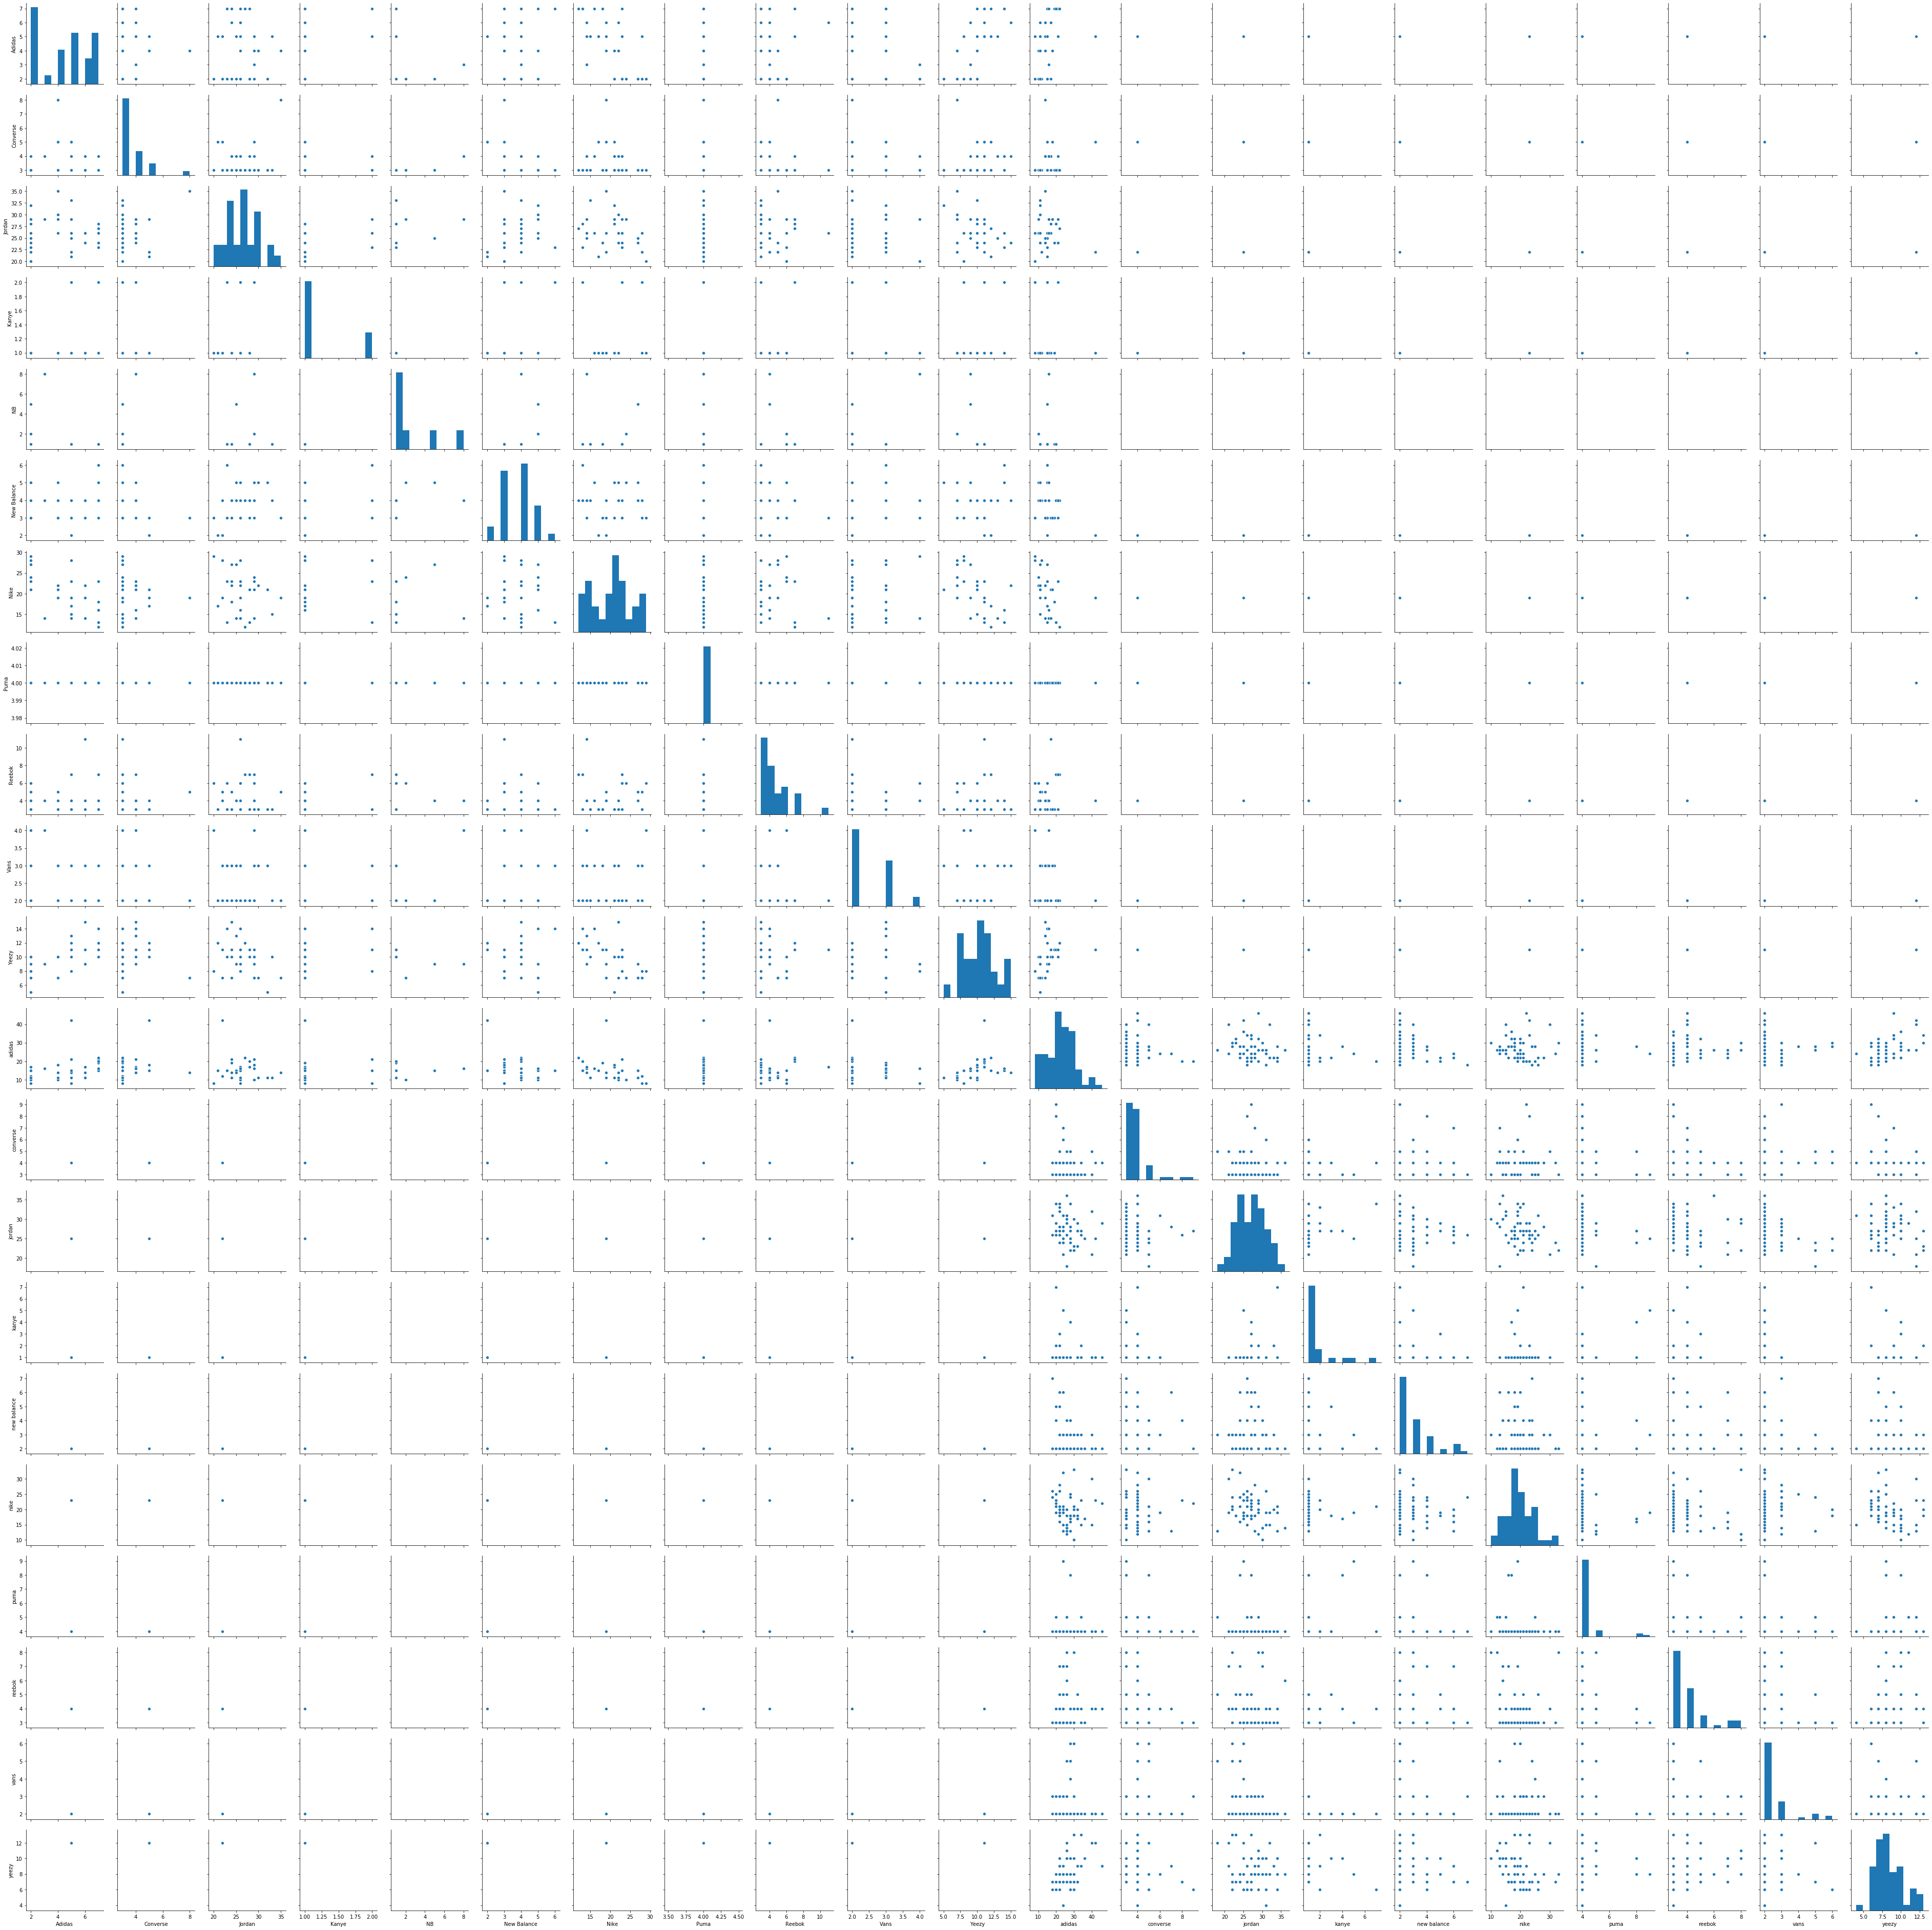

In [24]:
sns.pairplot(unstack_item_df) # pairplot the item dataframe

In [25]:
# 4.2.4: Date and Count dataframe
date_count_temp = master_df[['date','count']]
date_count_df = date_count_temp.groupby('date').sum().reset_index()
date_count_df

date  count
0  2019-11-16     92
1  2019-11-17     88
2  2019-11-18     92
3  2019-11-19     91
4  2019-11-20     90
..        ...    ...
82 2020-03-14     99
83 2020-03-15     97
84 2020-03-16     95
85 2020-03-18     96
86 2020-03-20    114

[87 rows x 2 columns]

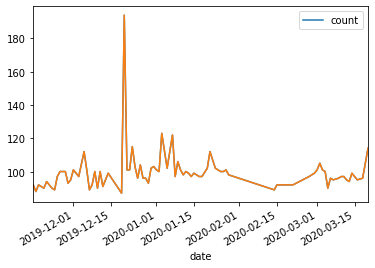

In [26]:

date_count_df.set_index('date', inplace=True)
date_count_df.plot()
plt.plot(date_count_df)


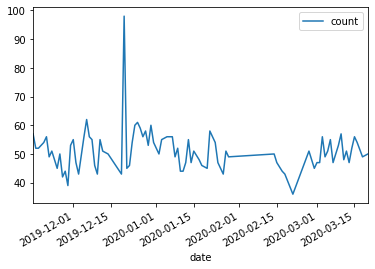

In [27]:
# 4.3.1: plot individual linear regression analysis for each shoe company -#
pf.timeseries_line_chart(master_df, 'Nike', 'Nike Timeseries')


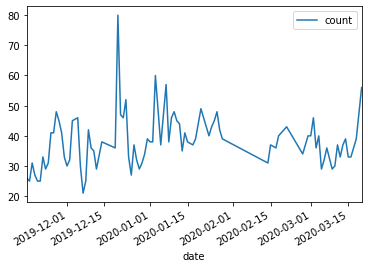

In [28]:
pf.timeseries_line_chart(master_df, 'Adidas', 'Adidas Timeseries')


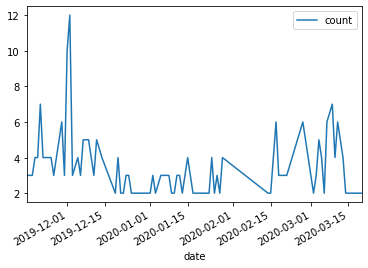

In [29]:
pf.timeseries_line_chart(master_df, 'New Balance', 'New Balance Timeseries')


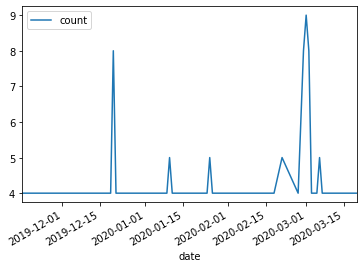

In [30]:
pf.timeseries_line_chart(master_df, 'Puma', 'Puma Timeseries')


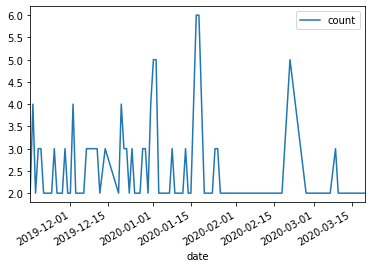

In [31]:
pf.timeseries_line_chart(master_df, 'Vans', 'Nike Timeseries')


 Displaying total history of shoe company mentions ...


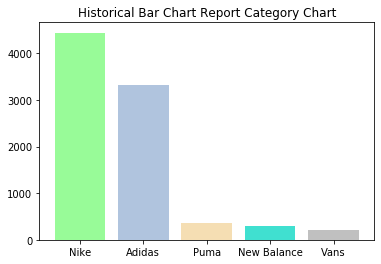

In [32]:
# 4.3.2: sorted bar chart -#
print("\n Displaying total history of shoe company mentions ...")
pf.bar_chart(master_df,'category_name', 'count', 'Historical Bar Chart Report')



 Displaying percentage breakdown by shoe companies...


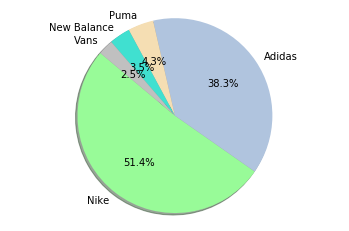

In [33]:
# 4.3.3: percentage pie chart -#
print("\n Displaying percentage breakdown by shoe companies...")
pf.pie_chart(master_df,'category_name', 'count', 'Historical Pie Report')


 Displaying timeseries summary by shoe company ...


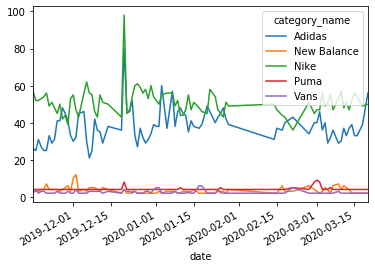

In [34]:
# 4.3.4: time series line chart categorized by shoe company -#
print("\n Displaying timeseries summary by shoe company ...")
pf.multiple_line_series(master_df, 'Historical Timeseries')